# KNN

K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms, 

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Dataset
Iris dataset contain features - sepal_length, sepal_width, petal_length, petal_width

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
data = dataset.iloc[:, :-1].values
label = dataset.iloc[:, 4].values

### Train Test Split
To avoid overfit dataset divided into train and test, This way our algorithm is tested on unseen data

In [6]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20)

### Feature Scaling
Compute mean and std to be used for later scaling that perform standardization by centering and scaling

In [7]:
scaler = StandardScaler()
scaler.fit(data_train)

data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

### Init & Train

In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data_train, label_train)

KNeighborsClassifier()

### Predict

In [9]:
label_pred = classifier.predict(data_test)

### Confusion Matrix

In [10]:
confusion_matrix(label_test, label_pred)

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)

### Compare
Comparing Error Rate with the K Value

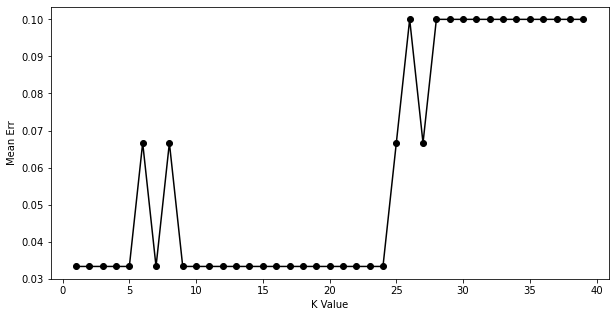

In [11]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, label_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != label_test))
    
plt.figure(figsize=(10, 5))
plt.xlabel('K Value'), plt.ylabel('Mean Err')
plt.plot(range(1, 40), error, color='black', marker='o')